# Settings

In [1]:
library(tidyverse)
library(ggplot2)
library(grid)
library(ggmap)
library(tabulizer)

Warning message:
"package 'tidyverse' was built under R version 3.5.2"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.3.1
v tibble  2.0.1     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.3.1     v forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'tidyr' was built under R version 3.5.2"Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'purrr' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"Warning message:
"package 'stringr' was built under R version 3.5.2"Warning message:
"package 'forcats' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

# Background

## Who am I?

## What is this talk about?

In [25]:
rov <- geocode(c('Rovinj', 'Dubrovnik'))

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Rovinj&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Dubrovnik&key=xxx


In [18]:
map <- get_map(location = 'Europe', maptype = "hybrid", zoom = 4)

Source : https://maps.googleapis.com/maps/api/staticmap?center=Europe&zoom=4&size=640x640&scale=2&maptype=hybrid&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Europe&key=xxx


In [19]:
eu <- map %>% ggmap()

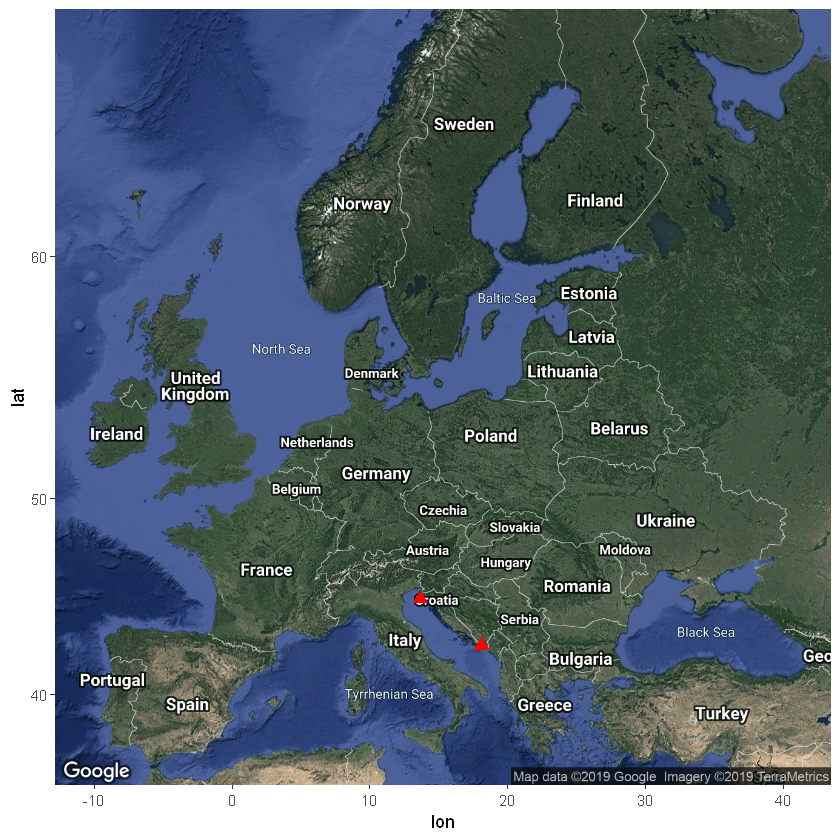

In [26]:
eu + geom_point(data = rov, aes(lon, lat), colour = "red", size = 3, pch = 17 ) 

Add pic of Dubrovnik and GoT.

# Data scrapping

In [2]:
url <- "https://mint.gov.hr/UserDocsImages/AA_2018_c-dokumenti/HTZ%20TUB%20HR_%202018%20(004).pdf"
data_2018 <- extract_tables(url)

## Get the tourist statistic by county (zupanija)

In [3]:
data_2018 <- data_2018 %>% 
pluck(11) %>% 
as_tibble() %>% 
slice(-1) 

Warning message:
"`as_tibble.matrix()` requires a matrix with column names or a `.name_repair` argument. Using compatibility `.name_repair`.
This warning is displayed once per session."Warning message:
"package 'bindrcpp' was built under R version 3.5.2"

In [4]:
data_2018 <- data_2018 %>%
setNames(as.character(data_2018[1,])) %>%
slice(4:n())

In [11]:
data_2018 %>% head()

Å½UPANIJA BROJ POSTELJA INDEKS BROJ POSTELJA U,INDEKS
"ZagrebaÄka 1.9082.472129,56 403773","191,8"
"Krapinsko-zagorska 2.7353.052111,59 1.3711.357","99,0"
"SisaÄko-moslavaÄka 1.1411.172102,72 217219","100,9"
"KarlovaÄka 8.28813.880167,47 746782","104,8"
"VaraÅ¾dinska 2.4283.205132,00 773796","103,0"
"KoprivniÄko-kriÅ¾evaÄka 67666097,63 357317","88,8"


The data looks like total crap: text formating is all weird with Croatian alphabet symbols (which is fixable), and several columns of interest merged into one (number of beds occupied for 2018 and 2017 is merged together with the region name, so would have to strsplit each cell separately). Therefore chose to create data by looking up tables instead.

## Create data frame with desired columns

In [64]:
data_2018 <- as.tibble(
Region = c('Zagrebacka','Krapinsko-zagorska','Sisacko-moslavacka','Karlovacka','Varazdinska','Koprivnicko-krizevacka',
          'Bjelovarsko-bilogorska','Primorsko-goranska','Licko-senjska','Viroviticko-podravska','Pozesko-slavnoska',
          'Brodsko-posavska','Zadarska','Osjecko-baranjska','Sibensko-kninska','Vukovarsko-srijemska','Splitsko-dalmatinska',
           'Istarska','Duborvacko-neretvanska','Medimurska', 'Grad Zagreb'),
rate2018 = c())

[1] "ZagrebaÄ\215ka 1.9082.472129,56 403773"

Get regional capitals from wikipedia by scrapping a table.

In [ ]:
wiki_url <- '//*[@id="mw-content-text"]/div/table[2]'